Dataset: [Formula 1 World Championships (1950-2023)](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [42]:
drivers = pd.read_csv('datasets/drivers.csv')
circuits = pd.read_csv('datasets/circuits.csv')
lap_times = pd.read_csv('datasets/lap_times.csv')
pit_stops = pd.read_csv('datasets/pit_stops.csv')
seasons = pd.read_csv('datasets/seasons.csv')
status = pd.read_csv('datasets/status.csv')
constructor_results = pd.read_csv('datasets/constructor_results.csv')
constructors = pd.read_csv('datasets/constructors.csv')
constructor_standings = pd.read_csv('datasets/constructor_standings.csv')
driver_standings = pd.read_csv('datasets/driver_standings.csv')
qualifying = pd.read_csv('datasets/qualifying.csv')
races = pd.read_csv('datasets/races.csv')
results = pd.read_csv('datasets/results.csv')
sprint_results = pd.read_csv('datasets/sprint_results.csv')


In [43]:
cons_res = constructors.merge(results,on='constructorId',how = 'left')
all_teams = cons_res[['name','points','raceId']]
all_teams = all_teams.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name='races')
all_teams

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
...,...,...
206,LDS-Alfa Romeo,1
207,Stebro,1
208,De Tomaso-Ferrari,1
209,Langley,1


Find the top teams that have done the most races

In [44]:
top_teams = all_teams[all_teams['races'] >= 100]
top_teams.head(10)

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


In [45]:
func = lambda x: x.points.sum()/x.raceId.nunique()
avg_points_per_race = cons_res[cons_res['name'].isin(all_teams.name)].groupby('name').apply(func)
avg_points_per_race = avg_points_per_race.sort_values(ascending=False).reset_index(name = 'points_per_race')
avg_points_per_race

C:\Users\abhig\AppData\Local\Temp\ipykernel_20144\1873386400.py:1: RuntimeWarning: invalid value encountered in scalar divide
  func = lambda x: x.points.sum()/x.raceId.nunique()


,name,points_per_race
0,Mercedes,25.299081
1,Red Bull,18.922222
2,Kurtis Kraft,10.833333
3,Brawn,10.117647
4,Ferrari,9.660666
...,...,...
206,Ewing,0.000000
207,McLaren-Alfa Romeo,0.000000
208,Ferguson,0.000000
209,AFM,0.000000


Historic overall points for the top constructors

In [46]:
historic_points = cons_res.groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index().head(10)
historic_points

,name,points
0,Ferrari,10298.27
1,Mercedes,7159.64
2,Red Bull,6812.00
3,McLaren,6240.50
4,Williams,3609.00
5,Renault,1777.00
6,Force India,1098.00
7,Team Lotus,995.00
8,Benetton,861.50
9,Tyrrell,711.00


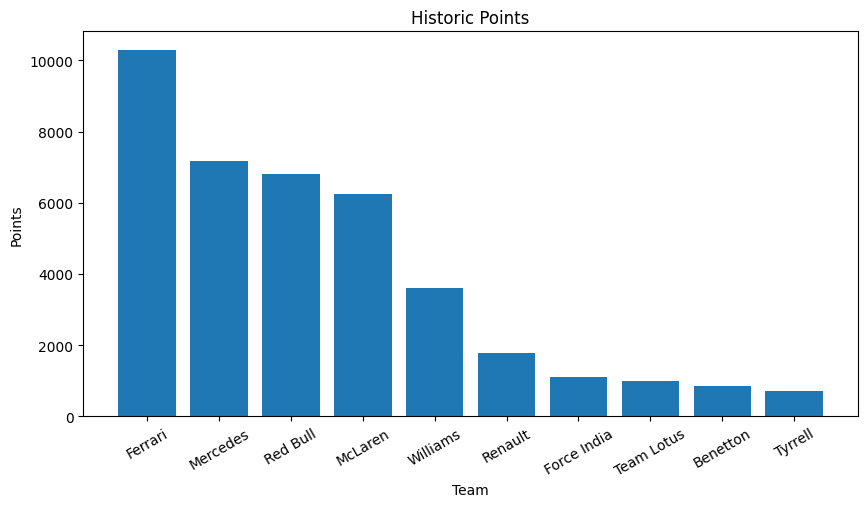

In [47]:
plt.figure(figsize=(10,5))
plt.bar(historic_points['name'], historic_points['points'])
plt.xlabel('Team')
plt.xticks(rotation=30) # Tilt the x-labels by 30 degrees
plt.ylabel('Points')
plt.title('Historic Points')
plt.show()


Let's merge some datasets and do some analysis

In [48]:
# Merging results, races, drivers, and constructors

df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [49]:
# Dropping unnecessary columns
df.drop(['raceId', 'driverId', 'constructorId', 'number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId'], axis=1, inplace=True)
df.head()

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [50]:
# Renaming columns to make them more readable
df.rename(columns={'rank':'fastestLapRank', 'name_x':'gpName', 'nationality_x':'driverNationality', 'name_y':'constructorName', 'nationality_y':'constructorNationality', 'driverRef':'driver'}, inplace=True)
df.head()

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,year,gpName,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [51]:
# Reorganize dataframe
df = df[['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]
df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending=[False, True, True])
df.reset_index(drop=True, inplace=True)
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736,6,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723,7,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373,5,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788,14,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713,10,1:36.546,201.802,British,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,\N,\N,\N,\N,\N,Italian,Swiss
26076,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,\N,\N,\N,\N,\N,French,French
26077,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,\N,\N,\N,\N,\N,Thai,Italian
26078,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,\N,\N,\N,\N,\N,German,Italian


In [52]:
# Check for null values
df.isnull().sum()

year                      0
gpName                    0
round                     0
driver                    0
constructorName           0
grid                      0
positionOrder             0
points                    0
time                      0
milliseconds              0
fastestLapRank            0
fastestLapTime            0
fastestLapSpeed           0
driverNationality         0
constructorNationality    0
dtype: int64

In [53]:
# Replace null values with actual null type
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastestLapRank.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)
df.isnull().sum()

year                          0
gpName                        0
round                         0
driver                        0
constructorName               0
grid                          0
positionOrder                 0
points                        0
time                      18829
milliseconds              18830
fastestLapRank            18249
fastestLapTime            18465
fastestLapSpeed           18465
driverNationality             0
constructorNationality        0
dtype: int64

In [54]:
# Adjust datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26080 non-null  int64  
 1   gpName                  26080 non-null  object 
 2   round                   26080 non-null  int64  
 3   driver                  26080 non-null  object 
 4   constructorName         26080 non-null  object 
 5   grid                    26080 non-null  int64  
 6   positionOrder           26080 non-null  int64  
 7   points                  26080 non-null  float64
 8   time                    7251 non-null   object 
 9   milliseconds            7250 non-null   float64
 10  fastestLapRank          7831 non-null   float64
 11  fastestLapTime          7615 non-null   object 
 12  fastestLapSpeed         7615 non-null   float64
 13  driverNationality       26080 non-null  object 
 14  constructorNationality  26080 non-null

In [60]:
# Plot settings
sb.set_palette('Set2')
plt.rcParams['figure.figsize'] = 10,5

([], [])

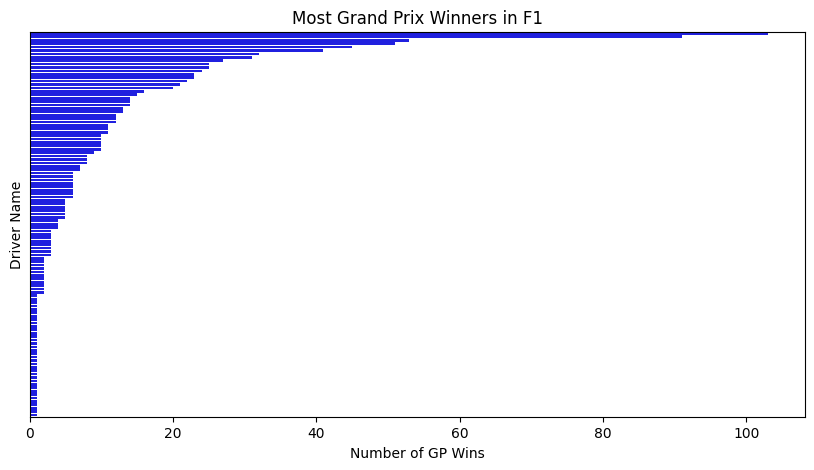

In [66]:
# All drivers that have raced in and won grand prix
driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
driver_winner.rename(columns={'positionOrder':'raceWins'}, inplace=True)
# Show the distribution of grand prix wins among drivers in a bar plot
sb.barplot(data=driver_winner, y='driver', x='raceWins', color='blue')
plt.title('Most Grand Prix Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [67]:
# Now let's find the top 10 drivers based on grand prix wins
top_10_drivers = driver_winner.head(10)
top_10_drivers

,driver,raceWins
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,max_verstappen,45
5,senna,41
6,alonso,32
7,mansell,31
8,stewart,27
9,lauda,25


Text(0.5, 0, 'Number of GP Wins')

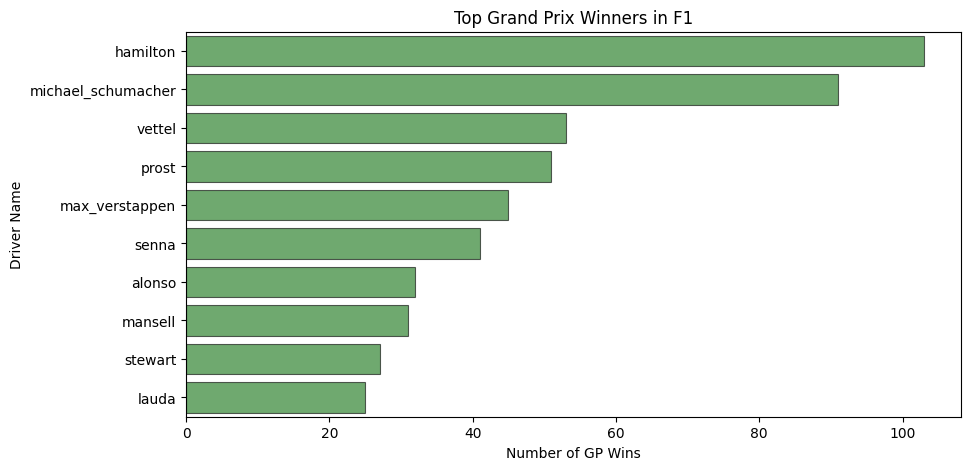

In [72]:
# Graph of the top 10 drivers
sb.barplot(data=top_10_drivers, y='driver', x='raceWins', color='green', alpha=0.6, linewidth=0.8, edgecolor='black')
plt.title('Top Grand Prix Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')

Text(0.5, 0, 'Number of GP Wins')

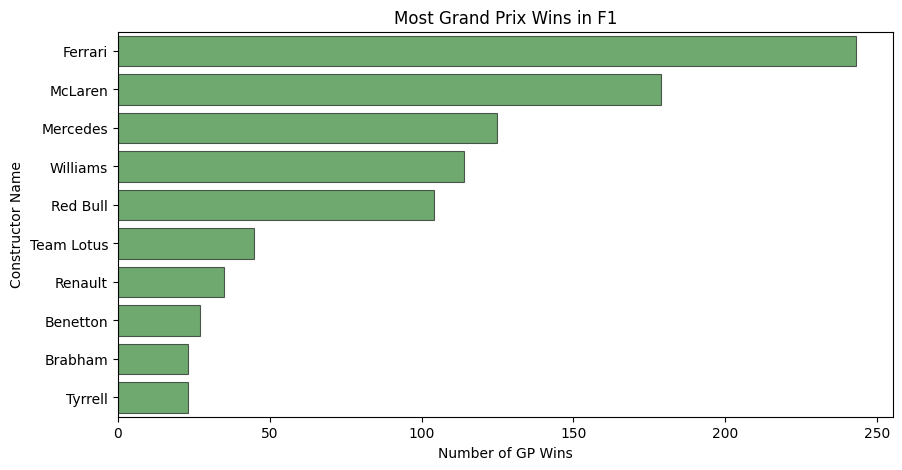

In [71]:
# Now we'll find the top 10 constructors
top_constructors = df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
top_constructors.rename(columns={'positionOrder':'raceWins'}, inplace=True)
top_10_constructors = top_constructors.head(10)

sb.barplot(data=top_10_constructors, y='constructorName', x='raceWins', color='green', alpha=0.6, linewidth=0.8, edgecolor='black')
plt.title('Most Grand Prix Wins in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')


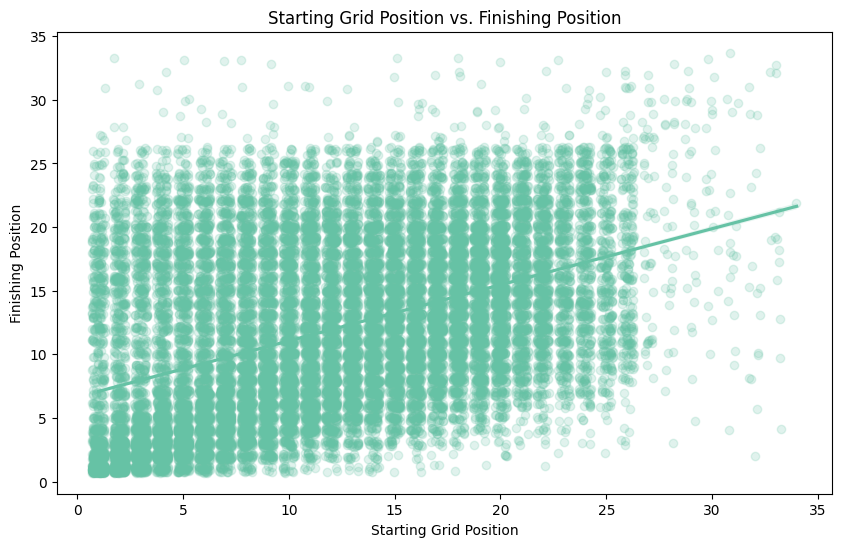

In [85]:
# Let's create a regression plot to see if starting position is correlated with finishing position

df_no_pit_start = df[df['grid'] != 0]

plt.figure(figsize=[10,6])
sb.regplot(data=df_no_pit_start, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':0.2})
plt.title('Starting Grid Position vs. Finishing Position')
plt.ylabel('Finishing Position')
plt.xlabel('Starting Grid Position')
plt.show()

Text(0.5, 0.98, 'Average Top Speed of All Teams at All Tracks Over the Years')

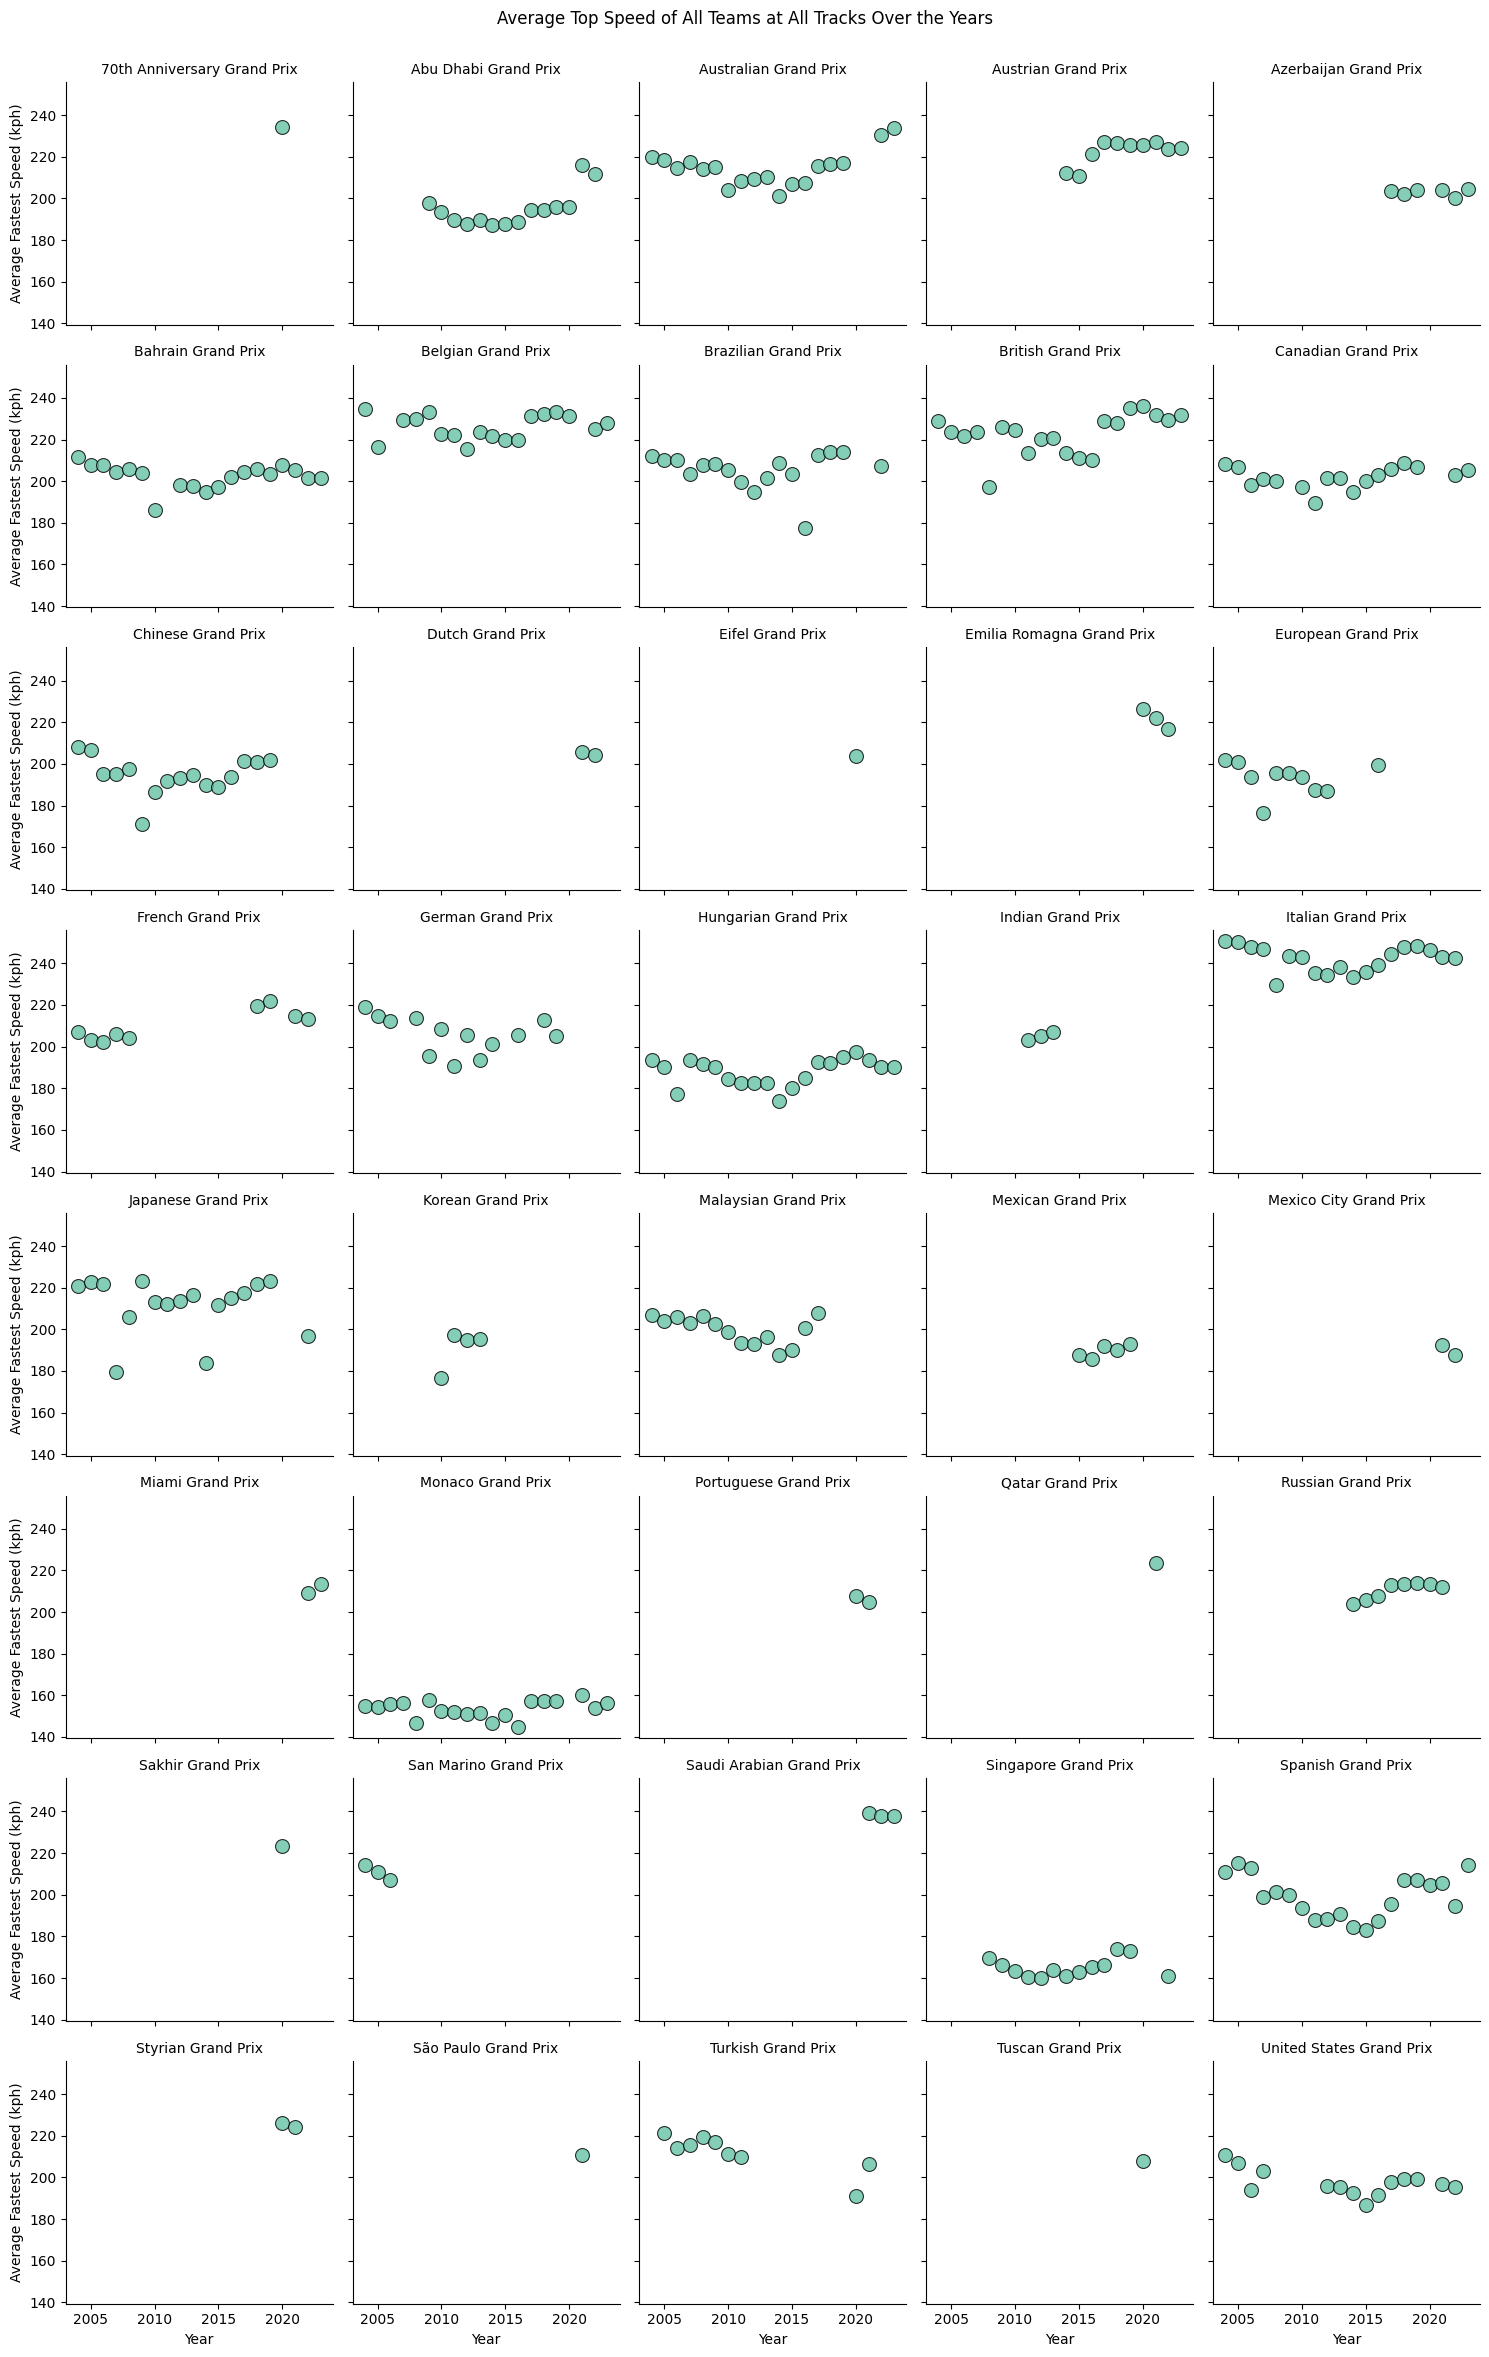

In [94]:
# Let's look at how the speed of the cars have changed over the years
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gpName', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

grid = sb.FacetGrid(data=df_group_speed, col='gpName', col_wrap=5)
grid.map(plt.scatter, 'year', 'fastestLapSpeed', alpha=0.8, linewidth=0.8, edgecolor='black', s=100)
grid.set_titles('{col_name}')
grid.set_xlabels('Year')
grid.set_ylabels('Average Fastest Speed (kph)')
plt.subplots_adjust(top=0.95)
grid.fig.suptitle("Average Top Speed of All Teams at All Tracks Over the Years")